In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#edge length of rectangle
a = 2
b = 3

In [3]:
def sample_over_rect(a,b, times):
    data = np.random.rand(2*times).reshape(times,2)
    data[:,0] *= a
    data[:,1] *= b
    return data

def size_from_data(data):
    cov = np.diagonal(np.cov(data.T))
    return np.sqrt(cov*12)

def size_from_covariance(cov):
    return np.sqrt(np.diagonal(cov)*12)

def update_covariance(x, n, mean,cov):
    x_mean = x-mean
    return n/(1+n) * cov + (n / (1+n)**2) * x_mean.T@x_mean
    
def update_mean(x, n, mean=0):
    return mean + ((x-mean)/(1+n))

In [4]:
theta = np.radians(30)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

In [71]:
n = 100000
data = np.zeros(n*3).reshape(n,3)
data[:,0] = np.random.rand(n)
data[:,1] = np.random.rand(n)

data_rot = data@R 

In [70]:
from scipy.spatial.transform import Rotation 
r = Rotation.from_quat([0, 0, np.sin(np.pi/4), np.cos(np.pi/4)])

R = r.as_matrix()


In [72]:
cov1 = np.cov(data.T)
print("cov1 = ", cov1)
cov2 = np.cov(data_rot.T)
print("cov2 = ", cov2)
s1 = size_from_covariance(cov1)
print("s1")
print(size_from_covariance(cov1))
s2 = size_from_covariance(cov2)
print("s2")
print(size_from_covariance(cov2))

print("---")


s2.sum()

cov1 =  [[0.08339    0.00024145 0.        ]
 [0.00024145 0.08313928 0.        ]
 [0.         0.         0.        ]]
cov2 =  [[ 0.08313928 -0.00024145  0.        ]
 [-0.00024145  0.08339     0.        ]
 [ 0.          0.          0.        ]]
s1
[1.00033993 0.998835   0.        ]
s2
[0.998835   1.00033993 0.        ]
---


1.9991749323001908

In [73]:
eigvals1, eigvecs1  = np.linalg.eig(cov1)
eigvals2, eigvecs2  = np.linalg.eig(cov2)
print(eigvals1)
print(eigvals2)

[0.08353669 0.08299259 0.        ]
[0.08299259 0.08353669 0.        ]


0.08330813694385122

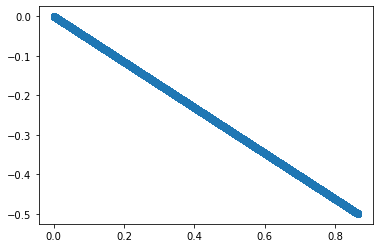

In [59]:
plt.scatter(data_rot[:,0], data_rot[:,1])

In [60]:
eigvals[0]

0.08327149200195655

In [17]:
update_covariance(np.array([1,2]), 2, np.array([1,2]), np.identity(2))

array([[0.66666667, 0.        ],
       [0.        , 0.66666667]])

In [8]:

samples = sample_over_rect(a,b,10000)

size_from_variance(samples)


array([2.00568935, 3.01980298])

In [19]:
# normalize over current 1/density

a1, b1 = 2, 3
a2, b2 = 1, 1

n = 1000000

def update_rect(a,b,sample,n,mean,cov):
    sample = sample_over_rect(a,b,n)
    mean = update_mean(sample, n, mean)
    cov = update_covariance(sample,n, mean, cov)
    n += 1
    return mean, cov, n


mean1 = np.array([0,0])
mean2 = np.array([0,0])
cov1 = np.zeros(4).reshape(2,2)
cov2 = np.zeros(4).reshape(2,2)
n1 = 0
n2 = 0
samples1 = []
samples2 = []
A1 = 0
A2 = 0
for i in range(n):
    A1 = size_from_covariance(cov1).prod()
    A2 = size_from_covariance(cov2).prod()  
    A_total = A1 + A2
    if A_total == 0:
        if np.random.rand() > 0.5:
            sample = sample_over_rect(a1,b1,1)
            sample = sample@R
            mean1 = update_mean(sample, n1, mean1)
            cov1 = update_covariance(sample,n1, mean1, cov1)
            n1 += 1
            samples1.append(sample)
        else:
            sample = sample_over_rect(a2,b2,1)
            mean2 = update_mean(sample, n2, mean2) 
            cov2 = update_covariance(sample, n2, mean2, cov2)
            samples2.append(sample)
            n2 += 1
    else:
        if A1 ==  A_total:
            sample = sample_over_rect(a2,b2,1)
            mean2 = update_mean(sample, n2, mean2) 
            cov2 = update_covariance(sample, n2, mean2, cov2)
            n2 += 1
            samples2.append(sample)

        elif A2 == A_total:  
            sample = sample_over_rect(a1,b1,1)
            sample = sample@R
            mean1 = update_mean(sample, n1, mean1)
            cov1 = update_covariance(sample,n1, mean1, cov1)
            n1 += 1
            samples1.append(sample)

            
        elif np.random.rand() < A1 / A_total:
            sample = sample_over_rect(a1,b1,1)
            sample = sample@R
            mean1 = update_mean(sample, n1, mean1)
            cov1 = update_covariance(sample,n1, mean1, cov1)
            n1 += 1
            samples1.append(sample)

        else:
            sample = sample_over_rect(a2,b2,1)
            mean2 = update_mean(sample, n2, mean2) 
            cov2 = update_covariance(sample, n2, mean2, cov2)
            n2 += 1
            samples2.append(sample)
            
            

In [126]:
# normalize over current 1/density

a1, b1 = 2, 3
a2, b2 = 1, 1

n = 1000000

def update_rect(a,b,sample,n,mean,cov):
    sample = sample_over_rect(a,b,n)
    mean = update_mean(sample, n, mean)
    cov = update_covariance(sample,n, mean, cov)
    n += 1
    return mean, cov, n


mean1 = np.array([0,0])
mean2 = np.array([0,0])
cov1 = np.zeros(4).reshape(2,2)
cov2 = np.zeros(4).reshape(2,2)
n1 = 0
n2 = 0
samples1 = []
samples2 = []
A1 = 0
A2 = 0
for i in range(n):
    if n1 != 0:
        A1 = size_from_covariance(cov1).prod()/n1
    if n2 != 0:
        A2 = size_from_covariance(cov2).prod()/n2
    A_total = A1 + A2
    if A_total == 0:
        if np.random.rand() > 0.5:
            sample = sample_over_rect(a1,b1,1)
            sample = sample@R
            mean1 = update_mean(sample, n1, mean1)
            cov1 = update_covariance(sample,n1, mean1, cov1)
            n1 += 1
            samples1.append(sample)
        else:
            sample = sample_over_rect(a2,b2,1)
            mean2 = update_mean(sample, n2, mean2) 
            cov2 = update_covariance(sample, n2, mean2, cov2)
            samples2.append(sample)
            n2 += 1
    else:
        if A1 ==  A_total:
            sample = sample_over_rect(a2,b2,1)
            mean2 = update_mean(sample, n2, mean2) 
            cov2 = update_covariance(sample, n2, mean2, cov2)
            n2 += 1
            samples2.append(sample)

        elif A2 == A_total:  
            sample = sample_over_rect(a1,b1,1)
            sample = sample@R
            mean1 = update_mean(sample, n1, mean1)
            cov1 = update_covariance(sample,n1, mean1, cov1)
            n1 += 1
            samples1.append(sample)

            
        elif np.random.rand() < (A1 / A_total):
            sample = sample_over_rect(a1,b1,1)
            sample = sample@R
            mean1 = update_mean(sample, n1, mean1)
            cov1 = update_covariance(sample,n1, mean1, cov1)
            n1 += 1
            samples1.append(sample)

        else:
            sample = sample_over_rect(a2,b2,1)
            mean2 = update_mean(sample, n2, mean2) 
            cov2 = update_covariance(sample, n2, mean2, cov2)
            n2 += 1
            samples2.append(sample)
            
            

In [20]:
samples1_arr = np.asarray(samples1)
samples1_arr = samples1_arr.reshape(samples1_arr.shape[0],2)

samples2_arr = np.asarray(samples2)
samples2_arr = samples2_arr.reshape(samples2_arr.shape[0],2)

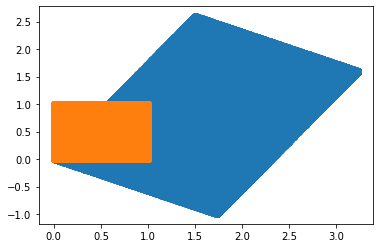

In [21]:
plt.scatter(x=samples1_arr[:,0], y=samples1_arr[:,1])
plt.scatter(x=samples2_arr[:,0], y=samples2_arr[:,1])



In [42]:
A1_gt = a1*b1
A2_gt = a2*b2

In [144]:
print(A1/(A1+A2))
print(A1_gt)
print(A2/(A1+A2))
print(A2_gt)

0.8643944157464125
6
0.13560558425358754
1


In [145]:
A2/A_total

0.13560558425358754

In [146]:
print(n1/A1_gt)
print(n2/A2_gt)


144282.0
134308.0


In [124]:
d1 = A1_gt/n1
d2 = A2_gt/n"1

SyntaxError: EOL while scanning string literal (<ipython-input-124-76bf7fde9871>, line 2)

In [57]:
#https://stats.stackexchange.com/questions/26123/efficient-method-technique-to-update-covariance-matrix

In [139]:
n2

283781

In [98]:
A2_gt

1

In [22]:
cov1

array([[0.43728505, 0.18023768],
       [0.18023768, 0.64523037]])

In [23]:
cov2

array([[0.08357031, 0.00013338],
       [0.00013338, 0.083533  ]])

In [24]:
np.trace(cov2)

0.16710331275077292

In [25]:
np.trace(cov1)

1.082515417658517

In [34]:
size_from_covariance(cov1)

array([2.2907249 , 2.78258233])

In [32]:
size_from_covariance(cov2).sum()

2.0026181503284253

In [38]:
s1 = np.sqrt(np.trace(cov1))*12
s2 = np.sqrt(np.trace(cov2))*12

In [39]:
s2/s1

0.392894079588551

In [40]:
s1/s2

2.545215242355462

In [41]:
A2_gt

NameError: name 'A2_gt' is not defined

In [43]:
A1_gt / A2_gt

6.0

In [44]:
np.linalg.eig(cov1)

(array([0.33318096, 0.74933446]),
 array([[-0.86593423, -0.50015789],
        [ 0.50015789, -0.86593423]]))